In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
data(hflights, package='hflights')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"

In [2]:
str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

In [3]:
flights.1 <- hflights %>% 
group_by(Origin, Dest) %>%
summarise(avg_delay = round(mean(DepDelay , na.rm = T), digit=3), 
          avg_ArrDelay = round(mean(ArrDelay, na.rm = T), digits=3))

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [4]:
head(flights.1)

Origin,Dest,avg_delay,avg_ArrDelay
HOU,ABQ,11.582,6.001
HOU,ATL,9.129,6.810
HOU,AUS,12.189,9.274
HOU,BHM,15.015,6.673
HOU,BKG,-3.202,-16.234
HOU,BNA,11.395,5.394


In [5]:
flights.melt <- melt(flights.1, id=c("Origin"), 
                     measure=c("avg_delay","avg_ArrDelay"),
                     variable.name = "Delay_type",
                     value.name = "Delay_time",
                     na.rm = T)

In [6]:
tail(flights.1, 6)

Origin,Dest,avg_delay,avg_ArrDelay
IAH,TPA,6.611,3.752
IAH,TUL,5.738,5.482
IAH,TUS,7.784,7.802
IAH,TYS,10.171,11.366
IAH,VPS,12.339,12.457
IAH,XNA,6.691,6.896


In [7]:
tail(flights.melt)

,Origin,Delay_type,Delay_time
293,IAH,avg_ArrDelay,3.752
294,IAH,avg_ArrDelay,5.482
295,IAH,avg_ArrDelay,7.802
296,IAH,avg_ArrDelay,11.366
297,IAH,avg_ArrDelay,12.457
298,IAH,avg_ArrDelay,6.896


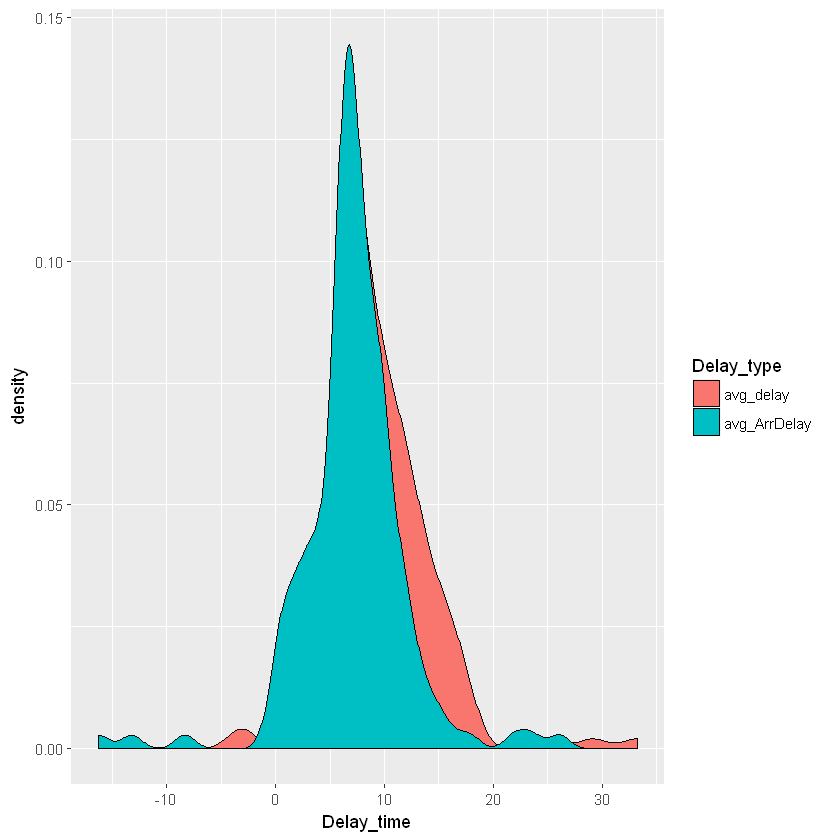

In [8]:
ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type)) + geom_density()

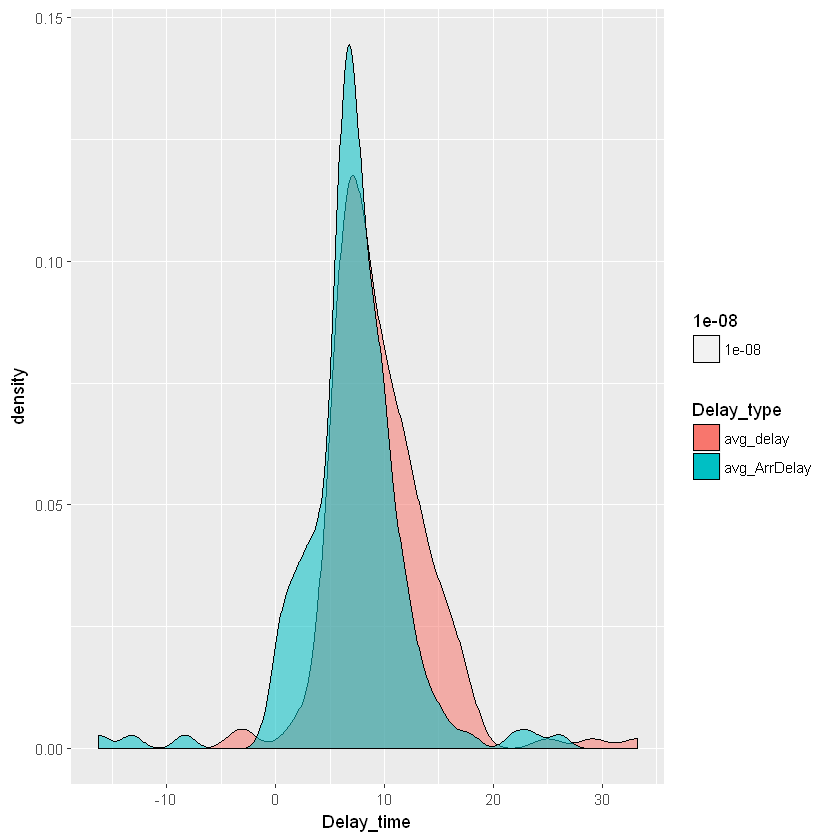

In [9]:
ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type, alpha = 0.00000001)) + 
geom_density()

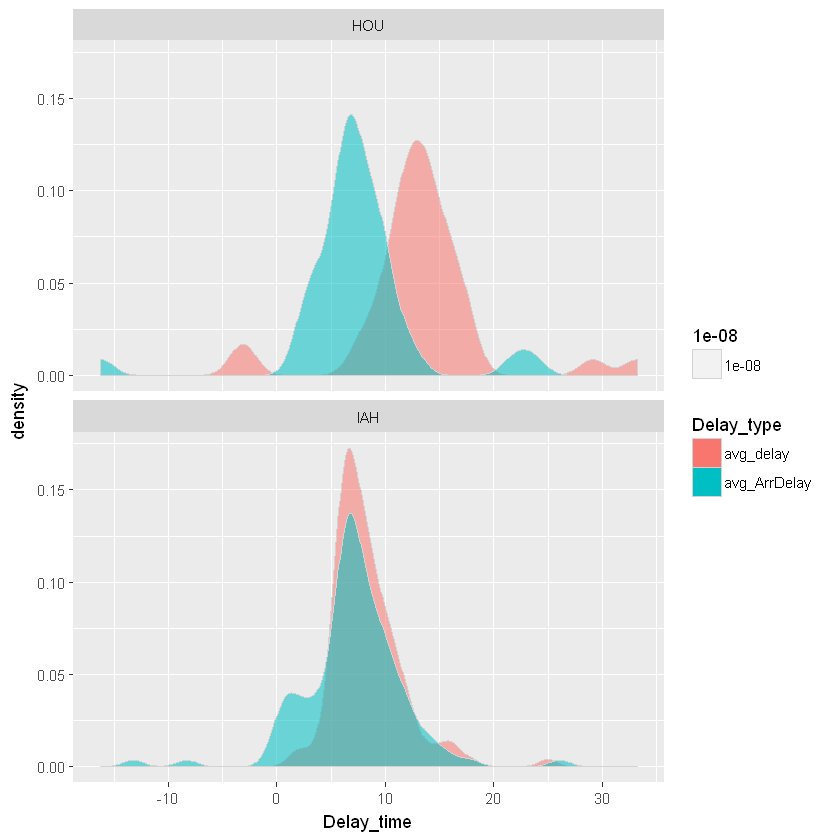

In [10]:
ggplot(flights.melt, aes(x=Delay_time, fill=Delay_type, alpha = 0.00000001)) + 
geom_density(colour = "lightgray", size = 0.00000001) +
facet_wrap(~Origin, nrow = 2)

Step 1 : 목적지 공항(Dest)에 대해 연착 건수를 구하고, 연착 건수가 2000회 이상인 공항에 대한 데이터만 따로 추출하시오. (연착 건수는 도착 지연시간(DepDelay) 5분 이상인 것으로 할 것)

In [11]:
head(hflights$DepDelay, 20)
head(hflights$DepDelay > 5, 20)
sum(hflights$DepDelay > 5, na.rm = T)

[1]  0  1 -8  3  5 -1 -1 -5 43 43 29 19 -2 -3 -1 -1 90  8 -4 67

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[13] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE

[1] 71417

In [12]:
length(hflights$DepDelay)
length(hflights$DepDelay > 5)

[1] 227496

[1] 227496

In [13]:
flights.2 <- hflights %>% 
group_by(Dest) %>%
summarise( num_DepDelay = sum(DepDelay > 5, na.rm = T))

In [14]:
flights.2 <- flights.2[flights.2$num_DepDelay >= 2000,]

위의 결과를 바탕으로 목적지 공항, 월별 결항 횟수, 회항 횟수, 운항 횟수를 구하시요
* 운항 횟수는 결항과 회황을 제외할 것

In [15]:
head(flights.2)

Dest,num_DepDelay
ATL,2088
DAL,3458
DEN,2183
LAX,2727
MSY,2145
ORD,2158


In [16]:
head(hflights$Dest == flights.2$Dest)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [17]:
head(hflights[hflights$Dest == flights.2$Dest,])

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
74665,2011,1,31,1,1522,1632,CO,33,N16647,70,...,-2,-3,IAH,MSY,305,7,21,0,,0
74683,2011,1,31,1,1803,1927,CO,59,N57870,144,...,15,28,IAH,DEN,862,12,16,0,,0
74866,2011,1,31,1,1924,2026,CO,423,N33266,62,...,-8,-1,IAH,MSY,305,2,19,0,,0
74966,2011,1,31,1,1313,1516,CO,601,N26208,183,...,36,9,IAH,DEN,862,18,34,0,,0
75033,2011,1,31,1,1423,1652,CO,746,N78524,149,...,-8,3,IAH,ORD,925,11,24,0,,0
75054,2011,1,31,1,1550,1736,CO,795,N76502,226,...,8,10,IAH,LAX,1379,13,15,0,,0


In [18]:
flights.4 <- hflights[hflights$Dest == flights.2$Dest,]

In [19]:
dim(flights.4)

[1] 7038   21

목적지 공항(Dest), 월별(Month) 결항 횟수(Cancelled), 회항 횟수(Diverted), 운항 횟수

In [20]:
head(flights.4$Dest)
head(flights.4$Cancelled)
head(flights.4$Diverted)

[1] "MSY" "DEN" "MSY" "DEN" "ORD" "LAX"

[1] 0 0 0 0 0 0

[1] 0 0 0 0 0 0

In [21]:
str(flights.4)

'data.frame':	7038 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  31 31 31 31 31 31 31 31 31 30 ...
 $ DayOfWeek        : int  1 1 1 1 1 1 1 1 1 7 ...
 $ DepTime          : int  1522 1803 1924 1313 1423 1550 2101 753 1027 1441 ...
 $ ArrTime          : int  1632 1927 2026 1516 1652 1736 2215 1032 1136 1610 ...
 $ UniqueCarrier    : chr  "CO" "CO" "CO" "CO" ...
 $ FlightNum        : int  33 59 423 601 746 795 1423 1746 1823 137 ...
 $ TailNum          : chr  "N16647" "N57870" "N33266" "N26208" ...
 $ ActualElapsedTime: int  70 144 62 183 149 226 74 159 69 209 ...
 $ AirTime          : int  42 116 41 131 114 198 42 117 42 185 ...
 $ ArrDelay         : int  -2 15 -8 36 -8 8 4 32 -3 -5 ...
 $ DepDelay         : int  -3 28 -1 9 3 10 -4 28 -3 13 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "MSY" "DEN" "MSY" "DEN" ...
 

In [22]:
dim(flights.4)

[1] 7038   21

In [23]:
length(flights.4$Cancelled > 1)

[1] 7038

In [24]:
length(flights.4$Cancelled)

[1] 7038

In [25]:
unique(hflights$Diverted)

[1] 0 1

In [26]:
dim(hflights)[1]

[1] 227496

In [27]:
length(hflights$Year)

[1] 227496

In [28]:
sum(hflights$Diverted)

[1] 649

In [29]:
sum(hflights$Diverted == 1)

[1] 649

In [30]:
sum(hflights$Diverted)

[1] 649

In [31]:
mode(hflights$Diverted)

[1] "numeric"

In [32]:
flights.5 <- flights.4 %>% 
group_by(Dest, Month) %>%
summarise(
    num_Cancelled = sum(Cancelled),
    num_Diverted = sum(Diverted),
    num_Air = length(Dest) - sum(Cancelled) - sum(Diverted)
)

In [33]:
str(flights.5)

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	72 obs. of  5 variables:
 $ Dest         : chr  "ATL" "ATL" "ATL" "ATL" ...
 $ Month        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ num_Cancelled: int  5 2 5 6 3 1 2 1 1 1 ...
 $ num_Diverted : int  0 0 0 2 0 2 0 1 0 0 ...
 $ num_Air      : int  96 90 121 121 129 112 102 106 101 102 ...
 - attr(*, "vars")= chr "Dest"
 - attr(*, "drop")= logi TRUE


In [34]:
head(flights.5,2)

Dest,Month,num_Cancelled,num_Diverted,num_Air
ATL,1,5,0,96
ATL,2,2,0,90


In [35]:
melt.hflights.5 <- melt(flights.5, c("Dest","Month"), 
                        c("num_Cancelled","num_Diverted","num_Air"), na.rm=T)

In [36]:
head(melt.hflights.5,1)

Dest,Month,variable,value
ATL,1,num_Cancelled,5


In [37]:
melt2.hflights.5 <- melt.hflights.5 %>%
group_by(Month, variable) %>%
mutate(cnt = value/sum(value))

head(melt2.hflights.5)

Dest,Month,variable,value,cnt
ATL,1,num_Cancelled,5,0.55555556
ATL,2,num_Cancelled,2,0.05263158
ATL,3,num_Cancelled,5,0.55555556
ATL,4,num_Cancelled,6,0.31578947
ATL,5,num_Cancelled,3,0.18750000
ATL,6,num_Cancelled,1,0.14285714


In [38]:
mm <- ggplot(melt2.hflights.5, aes(x=Month, y=cnt, fill=Dest)) + 
geom_bar(stat='identity')

Warning message:
"Removed 18 rows containing missing values (position_stack)."

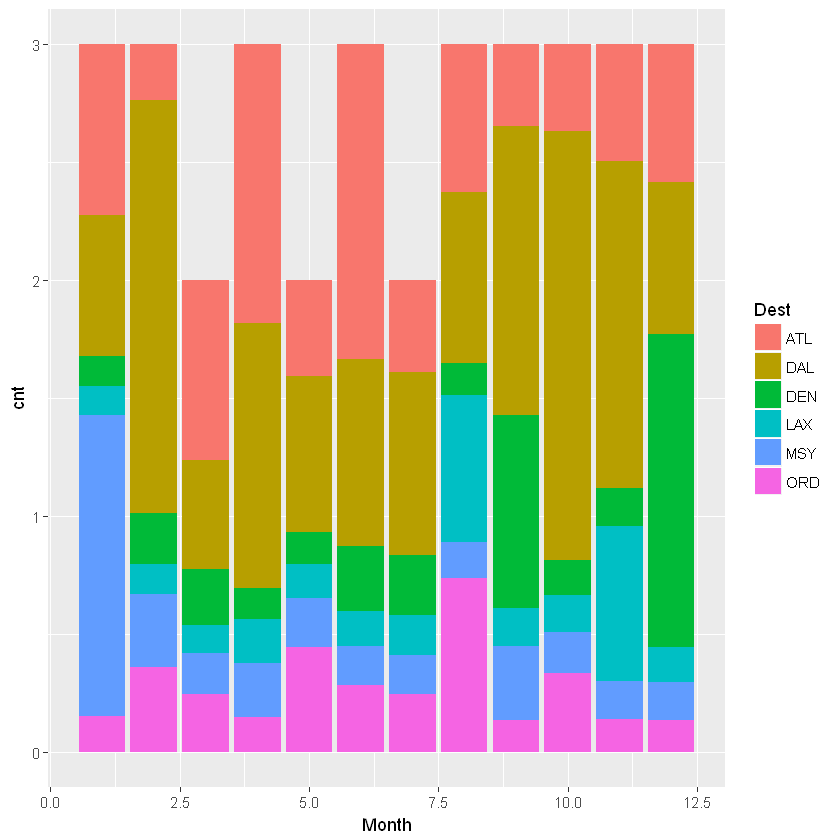

In [39]:
mm

Warning message:
"Removed 18 rows containing missing values (position_stack)."

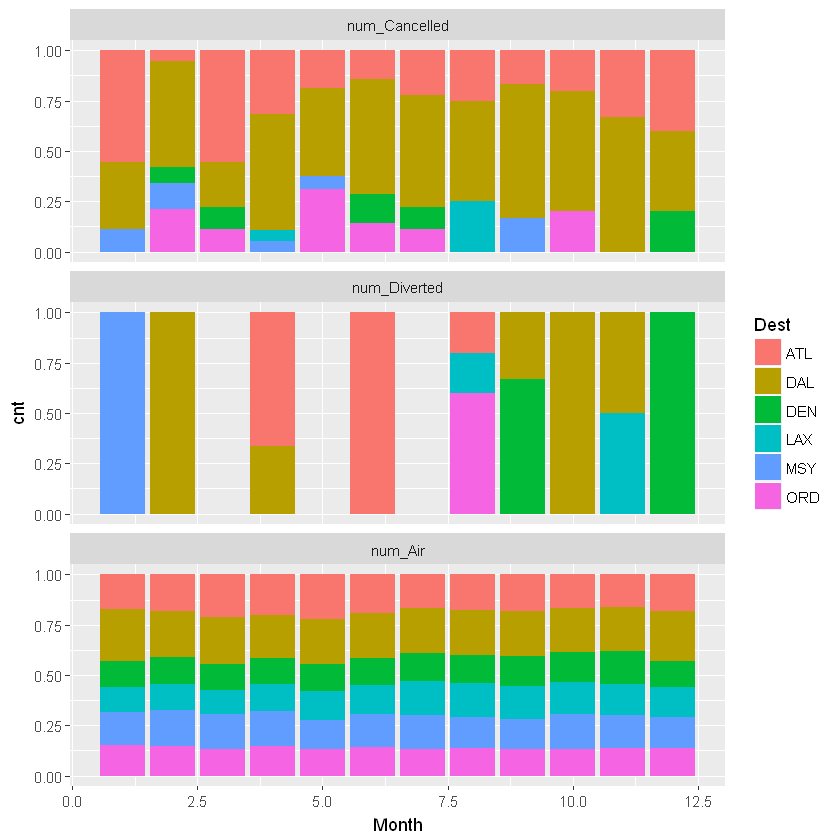

In [40]:
mm + facet_wrap(~ variable, nrow=3)

# 3번째

In [103]:
str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

1. 항공사별(UniqueCarrier)로 운항횟수를 구한 후에, 운항횟수에 대해서 내림차순으로 
2. 상위 3개 데이터만 뽑아보기 

In [46]:
flights.7 <- hflights %>% 
group_by(UniqueCarrier) %>%
summarise( 
    num_Air = length(Dest) - -sum(Cancelled)-sum(Diverted)
) %>%
arrange(desc(num_Air)) %>%
head(3)

In [47]:
flights.7

UniqueCarrier,num_Air
XE,73933
CO,70323
WN,45942


* 2.1번째 결과를 사용해서 상위 3개 항공사에 대한 평균 도착 지연(ArrDelay)시간, 평균 출발 지연시간(DepDelay)을 구하기
* 2.1 (평균 출발 지연시간과 평균 도착 지연시간은 소수점 셋째자리까지 표시)

In [48]:
flights.7$UniqueCarrier

[1] "XE" "CO" "WN"

In [52]:
a <- c(1,2,3,4,5, NA)

In [54]:
mean(a, na.rm = T)

[1] 3

In [ ]:
avg_DepDelay, avg_ArrDelay

In [72]:
tmp <- hflights[hflights$UniqueCarrier == flights.7$UniqueCarrier, ] %>%
group_by(UniqueCarrier) %>%
summarise(
    avg_DepDelay = round(mean(DepDelay, na.rm = T),  3),
    avg_ArrDelay = round(mean(ArrDelay, na.rm = T),  3)
)

In [74]:
carrier <- tmp %>% 
arrange(desc(avg_ArrDelay)) %>%
head(1)[1,1]

In [75]:
carrier

[1] "XE"

* 3.1 2번째 결과를 이용해서 평균 도착 지연시간이 가장 긴 항공사에 대한 데이터를 추출
* 3.2 월별, 요일별 평균 도착 지연시간과 평균 출발 지연 시간을 출력

In [79]:
hflights[hflights$UniqueCarrier == carrier, ]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
453313,2011,1,31,1,1623,1913,XE,2008,N11184,110,...,-15,-7,IAH,JAX,817,4,15,0,,0
453314,2011,1,31,1,1325,1644,XE,2010,N13992,139,...,7,-8,IAH,SDF,788,4,35,0,,0
453318,2011,1,31,1,2110,2203,XE,2024,N13949,53,...,-8,0,IAH,BTR,253,6,11,0,,0
453319,2011,1,31,1,1511,1824,XE,2025,N11140,NA,...,NA,1,IAH,ABQ,744,5,23,0,,1
453320,2011,1,31,1,714,907,XE,2026,N11191,113,...,-16,-6,IAH,STL,668,6,14,0,,0
453323,2011,1,31,1,1101,1353,XE,2029,N14952,112,...,12,21,IAH,ATL,689,8,13,0,,0
453326,2011,1,31,1,723,1056,XE,2035,N12160,153,...,-5,3,IAH,PIT,1117,8,8,0,,0
453327,2011,1,31,1,1024,1314,XE,2036,N34111,110,...,-9,-1,IAH,JAX,817,5,15,0,,0
453331,2011,1,31,1,1055,1338,XE,2041,N14105,163,...,8,-10,IAH,MKE,984,5,14,0,,0
453333,2011,1,31,1,1933,2106,XE,2042,N12201,93,...,-3,3,IAH,BHM,562,3,11,0,,0


In [60]:
b <- c(123,14,5,6,47,3,53,57,462,536)

In [64]:
order(-b)

[1] 10  9  1  8  7  5  2  4  3  6

In [66]:
b[order(-b)][1]

[1] 536

In [84]:
tmp

UniqueCarrier,avg_DepDelay,avg_ArrDelay
CO,9.123,5.986
WN,13.812,7.882
XE,7.801,8.239


In [96]:
head(mpg, 5)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [95]:
head(mpg, 5)[1:3,5:7]

cyl,trans,drv
4,auto(l5),f
4,manual(m5),f
4,manual(m6),f


In [97]:
head(mpg, 5)[,]

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [105]:
tmp[order(-tmp$avg_ArrDelay),][1,]$UniqueCarrier

[1] "XE"

In [107]:
dim(hflights[hflights$UniqueCarrier == carrier, ])

[1] 73053    21

In [108]:
hflights[hflights$UniqueCarrier == tmp[order(-tmp$avg_ArrDelay),][1,]$UniqueCarrier, ]

[1] 73053    21